In [47]:
import numpy as np
import time
d2 = 1

# Forward Kinematics (FK) compute function

In [21]:
def fk(q):
    th1 = q[0]
    th2 = q[1]
    d3 = q[2]
    P = np.array([d3*np.cos(th1)*np.sin(th2)-d2*np.sin(th1), d3*np.sin(th1)*np.sin(th2)+d2*np.cos(th1), d3*np.cos(th2)]).T
    return P

# FK computation 

In [39]:
np.random.seed(int(time.time()))
nDataPt = 1000
th1V = np.random.uniform(-np.pi,np.pi,nDataPt)
np.random.seed(int(time.time()))
th2V = np.random.uniform(-np.pi,np.pi,nDataPt)
np.random.seed(int(time.time()))
d3V = np.random.uniform(-0,3,nDataPt)
Pee = []
Q = np.vstack((th1V,th2V,d3V)).T
for i in np.arange(len(th1V)):
    qtmp = np.array([th1V[i],th2V[i],d3V[i]])
    Pee.append(fk(qtmp))
Pee = np.array(Pee)
print('X shape = ',Pee.shape)
print('Y shape = ',Q.shape)

X shape =  (1000, 3)
Y shape =  (1000, 3)


# Training Data Generation

In [43]:
from sklearn.model_selection import train_test_split
X = Pee
y = Q
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)
print('Training data input shape = ',X_train.shape)
print('Training data output shape = ',y_train.shape)
print('Testing data input shape = ',X_test.shape)
print('Testing data output shape = ',y_test.shape)

Training data input shape =  (800, 3)
Training data output shape =  (800, 3)
Testing data input shape =  (200, 3)
Testing data output shape =  (200, 3)


# Create ANN

In [48]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(50, activation='relu', input_shape=(3,), kernel_initializer='he_uniform'))

# Add one hidden layer 
model.add(Dense(20, activation='relu', kernel_initializer='he_uniform'))

# Add an output layer 
model.add(Dense(3, activation='linear'))

# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                200       
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 63        
Total params: 1,283
Trainable params: 1,283
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.10387313, -0.66328484,  0.26737761,  0.40262854, -0.22279334,
         -0.35407603, -0.5501883 , -0.6116954 , -0.41213787, -0.75010294,
         -0.6570316 ,  1.2318567 , -0.97157896, -0.326694  , -0.4387396 ,
         -0.21984601, -0.77087563, -0.71395206, -0.00923955,  0.37915707,
          1.3365194 ,  1.2641197 , -0.93729264, -0.8760671 , -0.80058306,
         -0.3055879 , -1.1570268 , -0.5041174 ,  1.0423352 ,  0.25339365,
          1.2981526 , -1.2036904 , -0.0160526 , -0.61421716, -1.1057498 ,
         -0.8008747 , -1.28111   ,  0.25855708, -0.89761525, -0.78562903,
          1.1942927 , -0.08197725, -0.12286651, -0.2186842 ,  0.28081667,
         -0.20669627,  0.42112553,  0.4583224 ,  0.5696167 , -0.65939146],
        [-0.6117976 , -0.12032449, -1.2882555 , -0.6680201 ,  0.41668427,
          1.2892724 , -0.38556504,  1.1817771 ,  0.37801135, -1.0874126 ,
         -0.25306726, -0.96139187,  0.36158252, -1.3221321 ,  1.2100276 ,
         -1.0390422 ,  0.24099934,  0

# Fit data/ Train model

In [60]:
from keras.optimizers import SGD
from keras.optimizers import Adam

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])
#opt = SGD(lr=0.01, momentum=0.9)
opt = Adam(learning_rate=0.001)
                   
history = model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
800/800 [==============================] - 2s 2ms/step - loss: 8.2824e-04 - accuracy: 0.9809 - val_loss: 2.3250e-04 - val_accuracy: 1.0000
Epoch 2/20
800/800 [==============================] - 2s 3ms/step - loss: 5.0874e-04 - accuracy: 0.9825 - val_loss: 0.0026 - val_accuracy: 0.9700
Epoch 3/20
800/800 [==============================] - 2s 3ms/step - loss: 0.0013 - accuracy: 0.9713 - val_loss: 2.7962e-04 - val_accuracy: 0.9500
Epoch 4/20
800/800 [==============================] - 2s 2ms/step - loss: 5.2695e-04 - accuracy: 0.9884 - val_loss: 0.0017 - val_accuracy: 0.9450
Epoch 5/20
800/800 [==============================] - 1s 2ms/step - loss: 0.0018 - accuracy: 0.9895 - val_loss: 8.3744e-05 - val_accuracy: 0.9950
Epoch 6/20
800/800 [==============================] - 1s 2ms/step - loss: 2.3819e-04 - accuracy: 0.9771 - val_loss: 3.1279e-04 - val_accuracy: 0.9350
Epoch 7/20
800/800 [==============================] - 2s 2ms/step - loss: 3.3087e-04 - accuracy: 0.9790 - val_loss: 

# Evaluate model and plot loss

Train loss : 0.002, Test loss: 0.002
Train accuracy : 0.967, Test accuracy: 0.950


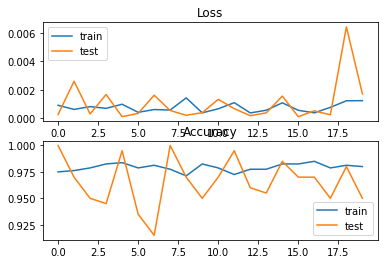

In [61]:
from matplotlib import pyplot
train_mse = model.evaluate(X_train, y_train, verbose=0)
test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train loss : %.3f, Test loss: %.3f' % (train_mse[0], test_mse[0]))
print('Train accuracy : %.3f, Test accuracy: %.3f' % (train_mse[1], test_mse[1]))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


# Run on test trajectory given

In [72]:
K = 100
traj = np.zeros((K,3))
traj[:,0] = -np.cos(np.linspace(0,4*np.pi,num=K))**2
traj[:,1] = np.sin(np.linspace(0,4*np.pi,num=K))**2
traj[:,2] = np.linspace(1,2,num=K)
Y = model.predict(traj)

# Plot the prediction

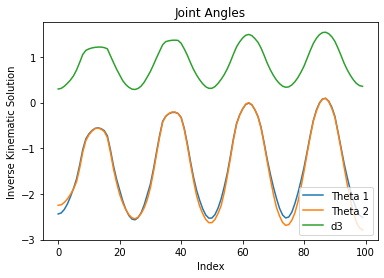

In [76]:
pyplot.title('Joint Angles')
pyplot.plot(Y[:,0], label='Theta 1')
pyplot.plot(Y[:,1], label='Theta 2')
pyplot.plot(Y[:,2], label='d3')
pyplot.legend()
pyplot.xlabel('Index')
pyplot.ylabel('Inverse Kinematic Solution')
pyplot.show()